In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


In [4]:
dt = pd.read_excel('iris.xls')
dt.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dt.shape

(150, 5)

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
dt.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
dt.columns


Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

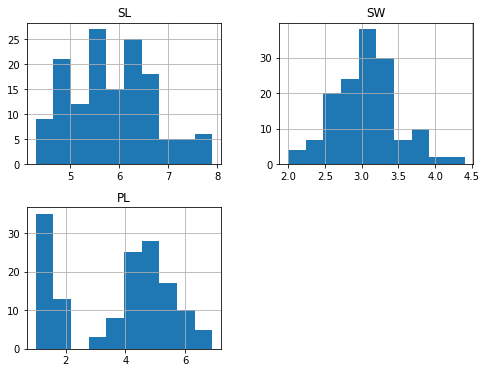

In [9]:
data = dt [['SL','SW','PL']]
data.hist(figsize=(8,6))
plt.show()

In [10]:
for i in ['SL','SW','PL']:
    dt[i]=dt[i].fillna(dt[i].mean())
dt

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,Iris-setosa
1,4.900000,3.0,1.40000,0.2,Iris-setosa
2,5.855944,3.2,1.30000,0.2,Iris-setosa
3,4.600000,3.1,1.50000,0.2,Iris-setosa
4,5.000000,3.6,1.40000,0.2,Iris-setosa
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica
146,6.300000,2.5,5.00000,1.9,Iris-virginica
147,6.500000,3.0,3.75625,2.0,Iris-virginica
148,6.200000,3.4,5.40000,2.3,Iris-virginica


In [11]:
dt.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

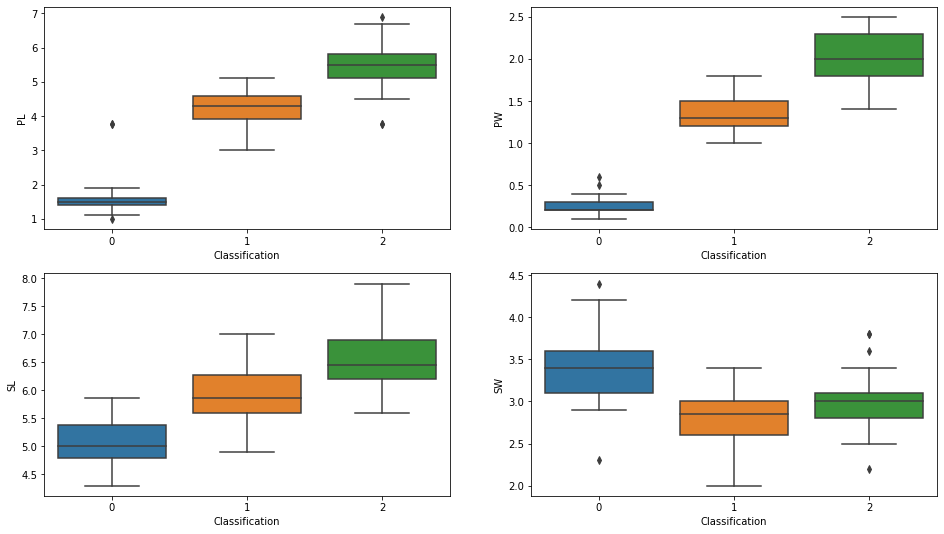

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=dt['PL'], x= 'Classification', data=dt, orient='v' , ax=axes[0, 0])
sns.boxplot( y=dt['PW'], x= 'Classification', data=dt, orient='v' , ax=axes[0, 1])
sns.boxplot( y=dt['SL'], x= 'Classification', data=dt, orient='v' , ax=axes[1, 0])
sns.boxplot( y=dt['SW'], x= 'Classification', data=dt, orient='v' , ax=axes[1, 1])
plt.show()

In [23]:
for column in dt.columns[0:4]:
    for classification in dt["Classification"].unique():
        class_type = dt[dt["Classification"] == classification]
        Selected_column = class_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        dt.drop(index = outlierss, inplace=True) # dropping outliers

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([15, 41], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([109, 117, 119, 131], dtype='int64')
Int64Index([22, 28, 42], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([118, 147], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


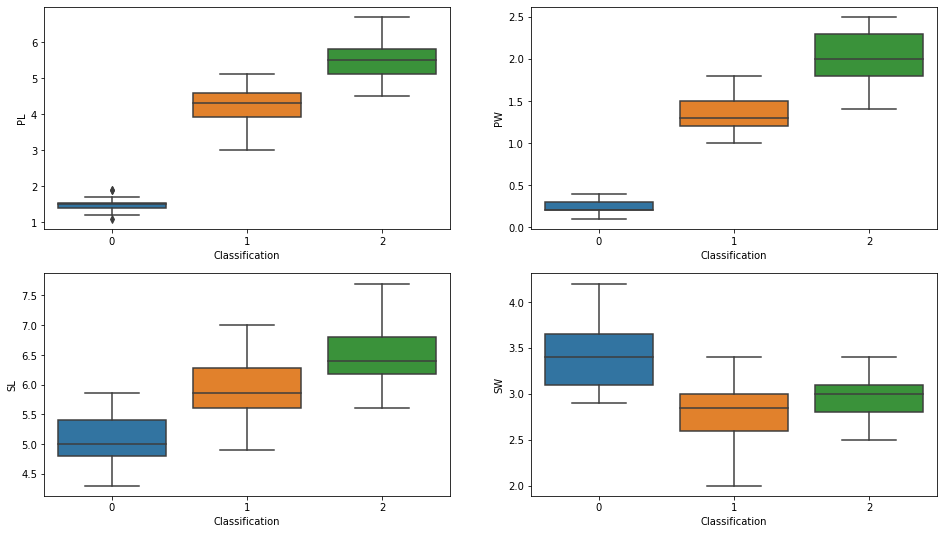

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=dt['PL'], x= 'Classification', data=dt, orient='v' , ax=axes[0, 0])
sns.boxplot( y=dt['PW'], x= 'Classification', data=dt, orient='v' , ax=axes[0, 1])
sns.boxplot( y=dt['SL'], x= 'Classification', data=dt, orient='v' , ax=axes[1, 0])
sns.boxplot( y=dt['SW'], x= 'Classification', data=dt, orient='v' , ax=axes[1, 1])
plt.show()

The existing outliers are removed

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dt['Classification']= LE.fit_transform(dt["Classification"])

In [13]:
dt

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [17]:
feature_cols = list(dt.columns[:-1])
target_col = dt.columns[-1] 
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['SL', 'SW', 'PL', 'PW']

Target column: Classification


In [25]:
#Splitting data
X = dt.drop(['Classification'],axis = 1)
Y = dt['Classification']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size = 0.3)

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [29]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average = 'weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average = 'weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average = 'weighted'))

Accuracy is : 0.9523809523809523
Precision is : 0.9579831932773109
Recall is : 0.9523809523809523
F1 is : 0.9518849206349206


In [30]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 11]], dtype=int64)

In [31]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train,Y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

In [32]:
acc_values

[0.9523809523809523,
 0.9761904761904762,
 0.9761904761904762,
 0.9523809523809523,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762,
 0.9761904761904762]

Text(0, 0.5, 'accuracy')

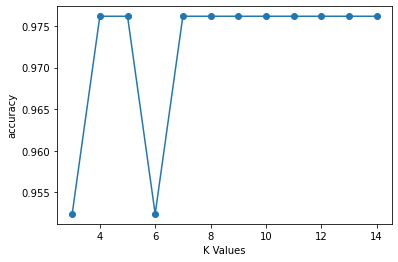

In [34]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('K Values')
plt.ylabel('accuracy')

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [36]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [37]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)

In [38]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

In [40]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [41]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)

In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt_model.predict(X_test)

In [44]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9285714285714286
Precision is : 0.9302721088435374
Recall is : 0.9285714285714286
F1 is : 0.9286626528005839


In [45]:
Y_test.value_counts()

1    15
0    14
2    13
Name: Classification, dtype: int64

In [46]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 12]], dtype=int64)

In [47]:
#SVM
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [48]:
y_pred = svm_linear.predict(X_test)

In [49]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [50]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(X_train,Y_train)

SVC(kernel='linear')

In [53]:
y_pred = svm_linear.predict(X_test)

In [54]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [55]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)

In [56]:
#Polynomial SVM
svm_poly = SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,Y_train)
y_pred = svm_poly.predict(X_test)

In [57]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9047619047619048
Precision is : 0.9248120300751881
Recall is : 0.9047619047619048
F1 is : 0.9017061370002546


In [58]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  4,  9]], dtype=int64)

In [59]:
#Radial SVM
svm_radial = SVC(kernel ='rbf')
svm_radial.fit(X_train,Y_train)
y_pred = svm_radial.predict(X_test)

In [60]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [61]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)

In [62]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [63]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9761904761904762
Precision is : 0.9776785714285714
Recall is : 0.9761904761904762
F1 is : 0.9760983102918588


In [64]:
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 12]], dtype=int64)